In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[2, 10, 5, 8, 8]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

2     0.0281
3     0.0836
4     0.1681
5     0.2814
6     0.4181
7     0.5808
8     0.7209
9     0.8362
10    0.9200
11    0.9713
12    1.0000
Name: count, dtype: float64

<Axes: >

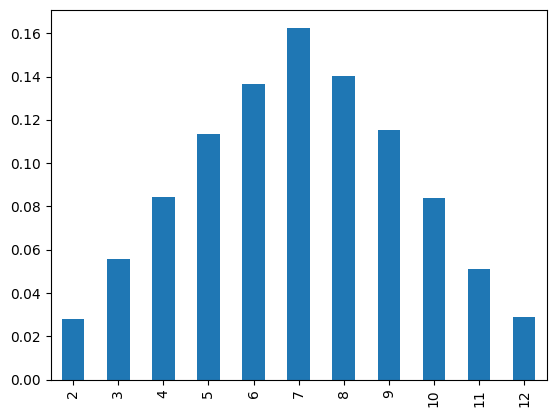

In [8]:
s.plot(kind='bar')

<Axes: >

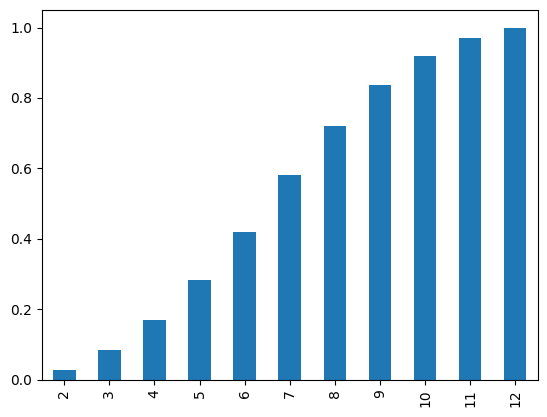

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [11]:
sample.mean()

49.904932181908386

(array([  5.,  14.,  78., 165., 274., 234., 153.,  58.,  15.,   4.]),
 array([32.33730222, 35.9201167 , 39.50293118, 43.08574566, 46.66856014,
        50.25137462, 53.8341891 , 57.41700359, 60.99981807, 64.58263255,
        68.16544703]),
 <BarContainer object of 10 artists>)

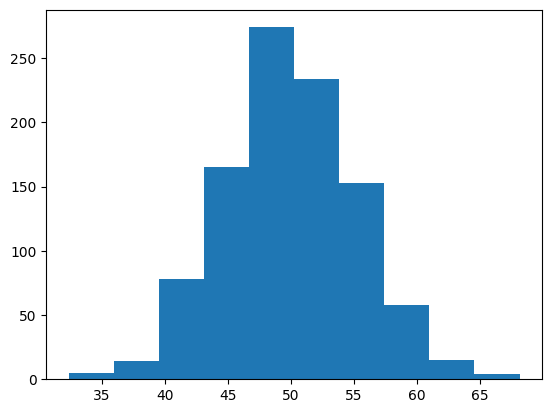

In [12]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [13]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [14]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [15]:
values = np.linspace(sample.min(),sample.max(),100)

In [16]:
sample.max()

68.16544702856875

In [17]:
probabilities = [dist.pdf(value) for value in values]

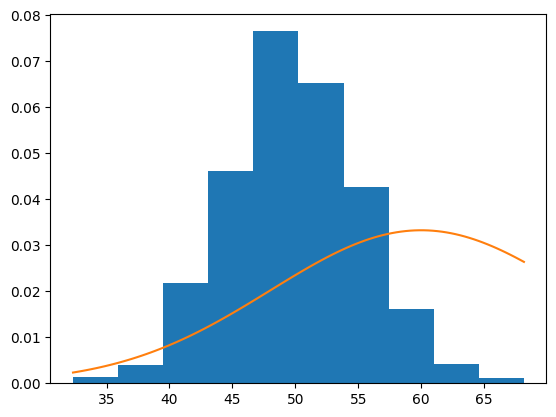

In [18]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

/var/folders/rs/nwdm5_tx1yx4mc85mxl32bx40000gn/T/ipykernel_31859/1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

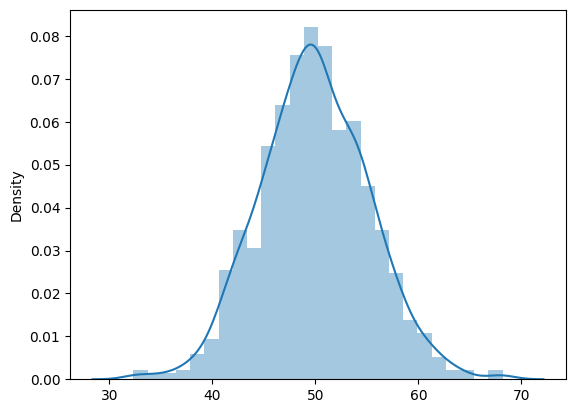

In [19]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [20]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [21]:
sample

array([ 8.81689333, 23.11693112, 23.75191828, 12.9145829 , 21.88396614,
       17.13107546, 14.40140359, 21.18699855, 23.57628736, 32.67564141,
       19.88468214, 24.27966802, 13.21947601, 23.18086003, 21.83367592,
       23.82935519, 15.44123085, 17.48942586, 20.43650662, 15.88935555,
       21.07260413, 21.94398419, 23.19681312, 17.68121557, 20.79516301,
       21.39505762, 16.26278157, 23.94879859,  9.80648159, 19.67070958,
       13.49919328, 15.02837388, 24.13496665, 21.01879471, 28.36516752,
       16.61672268, 24.00547804, 15.31184339, 17.2215187 , 18.50840425,
       22.93743242, 14.56899793, 21.23068887, 21.36270171, 12.57853761,
       11.23923109, 22.50509339, 14.89747227, 12.42464388, 18.08553281,
        8.58473155, 23.10874002, 12.55864725,  8.41828202, 22.76241051,
       23.07413515, 25.88084338, 10.54255529, 16.83479726, 22.11711717,
       25.30027633, 21.82319997, 23.02855028, 21.31034931, 18.98179736,
       12.37667305, 27.04811208, 15.78943375, 16.26176769, 14.38

(array([ 1.,  1.,  1.,  3.,  2.,  2.,  6., 11.,  7., 14., 16., 21., 19.,
        23., 24., 27., 26., 23., 18., 18., 14., 12.,  7.,  8.,  8., 13.,
        20., 12., 25., 37., 49., 47., 54., 54., 62., 58., 55., 56., 30.,
        34., 30., 18.,  9.,  9.,  3.,  5.,  3.,  3.,  0.,  2.]),
 array([ 4.61197687,  5.64532312,  6.67866938,  7.71201564,  8.7453619 ,
         9.77870815, 10.81205441, 11.84540067, 12.87874692, 13.91209318,
        14.94543944, 15.9787857 , 17.01213195, 18.04547821, 19.07882447,
        20.11217072, 21.14551698, 22.17886324, 23.2122095 , 24.24555575,
        25.27890201, 26.31224827, 27.34559452, 28.37894078, 29.41228704,
        30.4456333 , 31.47897955, 32.51232581, 33.54567207, 34.57901833,
        35.61236458, 36.64571084, 37.6790571 , 38.71240335, 39.74574961,
        40.77909587, 41.81244213, 42.84578838, 43.87913464, 44.9124809 ,
        45.94582715, 46.97917341, 48.01251967, 49.04586593, 50.07921218,
        51.11255844, 52.1459047 , 53.17925095, 54.21259721,

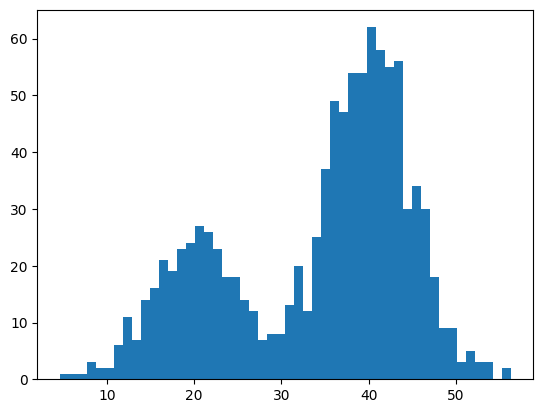

In [22]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [26]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 831.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 1.1 MB/s eta 0:00:0000:0100:01


In [27]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [28]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [29]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

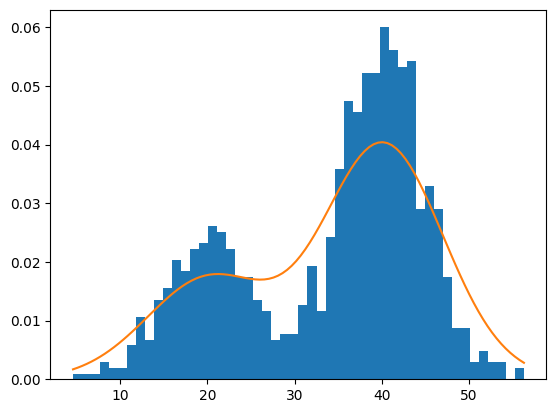

In [30]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

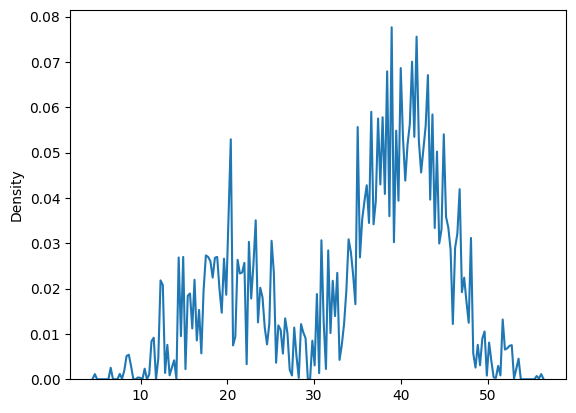

In [31]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [32]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

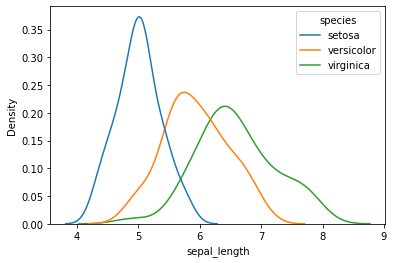

In [ ]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

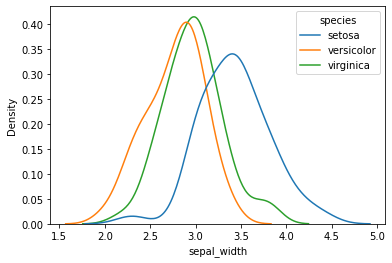

In [ ]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

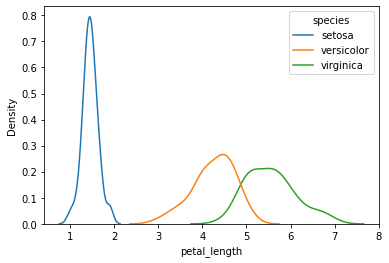

In [ ]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

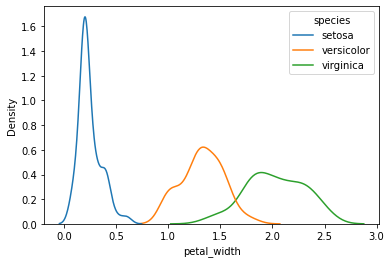

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

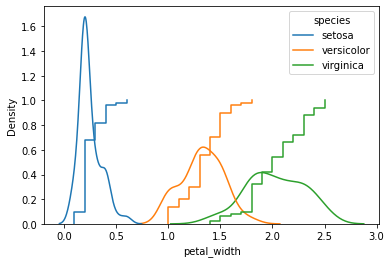

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

# according to data .7<pet_width<1.7 versicolor is falling and to quantify how sure we are we can say:-

#using this cfd we can say that petal_width<1.7 = versicolor 
#we are 95% sure that the flower is varsicolor
#and petal_width >1.7 = virginica we are 90% of the times this flower is there
#and 10% times virginica is <1.7

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

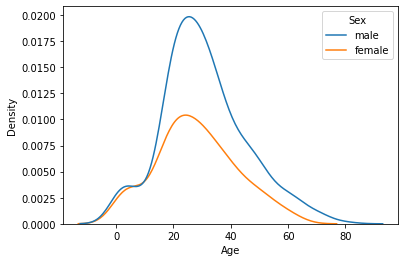

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

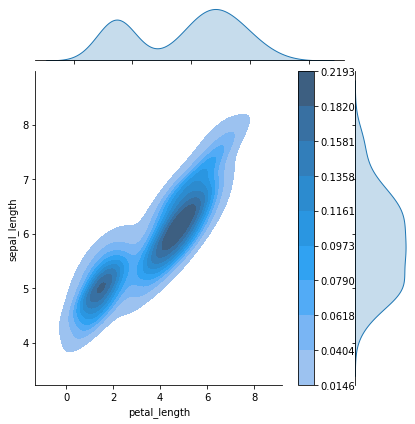

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

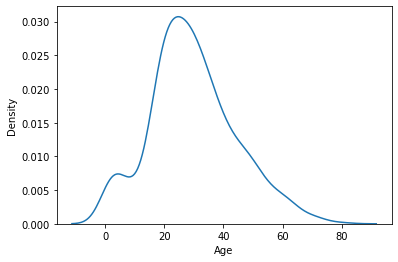

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

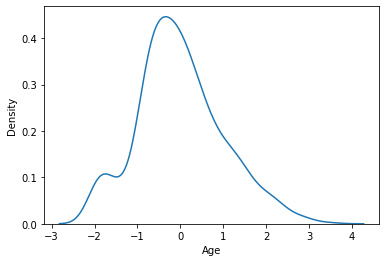

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

2.338621049070358e-16

In [ ]:
x.std()

1.0

In [ ]:
titanic['Age'].skew()

0.38910778230082704

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [ ]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
titanic['Age'].max()

80.0